In [1]:
import numpy as np
import cv2
import matplotlib.pylab as plt
import math
import pytesseract as pt
MINIMAP_SIZE = 280
VIDEO_FILE = "test.mp4"
FPS = 30
DISTANCE_THRESHOLD = 50

def extract_minimap(frame):
    minimap = np.zeros((MINIMAP_SIZE, MINIMAP_SIZE, 3), np.dtype('uint8'))
    for i in range(MINIMAP_SIZE):
        for j in range(MINIMAP_SIZE):
            for k in range(3):
                minimap[i][j][k] = frame[15 + i][1625 + j][k]
    return minimap

def extract_wood_count(frame):
    wood = np.zeros((25, 50, 3), np.dtype('uint8'))
    for i in range(25):
        for j in range(50):
            for k in range(3):
                wood[i][j][k] = frame[685 + i][1740 + j][k]
    return wood
    
def extract_brick_count(frame):
    brick = np.zeros((25, 50, 3), np.dtype('uint8'))
    for i in range(25):
        for j in range(50):
            for k in range(3):
                brick[i][j][k] = frame[685 + i][1800 + j][k]
    return brick
    
def extract_metal_count(frame):
    metal = np.zeros((25, 50, 3), np.dtype('uint8'))
    for i in range(25):
        for j in range(50):
            for k in range(3):
                metal[i][j][k] = frame[685 + i][1860 + j][k]
    return metal

def extract_health(frame):
    health = np.zeros((20, 37, 3), np.dtype('uint8'))
    for i in range(20):
        for j in range(37):
            for k in range(3):
                health[i][j][k] = frame[940 + i][967 + j][k]
    return health

def extract_shield(frame):
    shield = np.zeros((20, 37, 3), np.dtype('uint8'))
    for i in range(20):
        for j in range(37):
            for k in range(3):
                shield[i][j][k] = frame[940 + i][770 + j][k]
    return shield

def extract_players(frame):
    players = np.zeros((30, 40, 3), np.dtype('uint8'))
    for i in range(30):
        for j in range(40):
            for k in range(3):
                players[i][j][k] = frame[310 + i][1782 + j][k]
    return players

def extract_kills(frame):
    kills = np.zeros((30, 40, 3), np.dtype('uint8'))
    for i in range(30):
        for j in range(40):
            for k in range(3):
                kills[i][j][k] = frame[310 + i][1862 + j][k]
    return kills

def convert_to_greenscale(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            img[i][j][0] = 0
            img[i][j][2] = 0
    return img

def convert_to_greenscale_minimap(img):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if (img[i][j][0] > 140 and img[i][j][2] > 140):
                img[i][j][1] = int(img[i][j][1] * 2)
            img[i][j][0] = 0
            img[i][j][2] = 0
    return img

def distance(loc1, loc2):
    diff1 = loc1[0] - loc2[0]
    diff2 = loc1[1] - loc2[1]
    return math.sqrt(diff1 * diff1 + diff2 * diff2)

In [2]:
s4map = cv2.imread('Fortnite-map-season4-high-res.jpg', cv2.IMREAD_COLOR)
s4map_3k = cv2.imread('Fortnite s4map 3k.jpg', cv2.IMREAD_COLOR)
s4map_1500 = cv2.imread('Fortnite s4map 1500.jpg', cv2.IMREAD_COLOR)
test5x5 = cv2.imread('test5x5.jpg', cv2.IMREAD_COLOR)
test2x2 = cv2.imread('testTile2x2.jpg', cv2.IMREAD_COLOR)
testTile = cv2.imread('test tile.jpg', cv2.IMREAD_COLOR)
checked = np.zeros((s4map.shape[0], s4map.shape[1]))

In [ ]:
res = cv2.matchTemplate(s4map, testTile, cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 280, top_left[1] + 280)
actual_loc = (top_left[0] + 140, top_left[1] + 140)
print(actual_loc)

plt.imshow(s4map)
plt.show()
plt.imshow(testTile)
plt.show()

In [ ]:
res = cv2.matchTemplate(test5x5,test2x2,cv2.TM_SQDIFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = min_loc
bottom_right = (top_left[0] + 2, top_left[1] + 2)
#cv2.rectangle(test5x5,top_left, bottom_right, 255, 2)

plt.subplot(121),plt.imshow(res)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(test5x5)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()
print(top_left)
print(min_loc)

In [ ]:
import os

def video_to_frames(video, path_output_dir):
    # extract frames from a video and save to directory as 'x.png' where 
    # x is the frame index
    vidcap = cv2.VideoCapture(video)
    count = 0
    while vidcap.isOpened():
        success, image = vidcap.read()
        if success:
            cv2.imwrite(os.path.join(path_output_dir, '%d.png') % count, image)
            count += 1
        else:
            break
    cv2.destroyAllWindows()
    vidcap.release()

In [3]:
cap = cv2.VideoCapture("Fortnite Videos/" + VIDEO_FILE)
frameCount = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frameWidth = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frameHeight = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
seconds = frameCount // 30
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

print(frameCount)
print(frameWidth)
print(frameHeight)

fc = 0
ret = True

for i in range(frameCount):
    if (i % 30 == 0):
        ret, buf[fc] = cap.read()
    else:
        cap.read()
    fc += 1
    if (fc % 1000 == 0):
        print(fc)

cap.release()

23622
1920
1080
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000


In [ ]:
testFrame = buf[75*30]
plt.imshow(extract_wood_count(testFrame))
plt.show()
print(pt.image_to_string(extract_wood_count(testFrame)))
plt.imshow(extract_brick_count(testFrame))
plt.show()
print(pt.image_to_string(extract_brick_count(testFrame)))
plt.imshow(extract_metal_count(testFrame))
plt.show()
print(pt.image_to_string(extract_metal_count(testFrame)))
plt.imshow(extract_health(testFrame))
plt.show()
print(pt.image_to_string(extract_health(testFrame)))
plt.imshow(extract_shield(testFrame))
plt.show()
print(pt.image_to_string(extract_shield(testFrame)))
plt.imshow(extract_players(testFrame))
plt.show()
print(pt.image_to_string(extract_players(testFrame)))
plt.imshow(extract_kills(testFrame))
plt.show()
print(pt.image_to_string(extract_kills(testFrame)))
plt.imshow(testFrame)
plt.show()

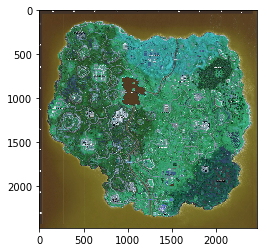

75
100
125
150
175
200
225
250
275
300
325
350
375
400
425
450


In [4]:
plt.imshow(s4map_3k)
plt.show()
file = open(VIDEO_FILE + " data.txt", "w")
old_loc = (-1, -1)
old_wood = 0
old_brick = 0
old_metal = 0

for i in range(75, 460):
    frame = i*30
    
    minimap = extract_minimap(buf[frame])
    #print(minimap[20][75], minimap[20][126])
    res = cv2.matchTemplate(s4map_3k, minimap, cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = min_loc
    bottom_right = (top_left[0] + MINIMAP_SIZE, top_left[1] + MINIMAP_SIZE)
    actual_loc = (top_left[0] + MINIMAP_SIZE/2, top_left[1] + MINIMAP_SIZE/2)
    #plt.imshow(minimap)
    #plt.show()
    
    wood = pt.image_to_string(extract_wood_count(buf[frame]))
    if (wood == ""):
        wood = "0"
    elif (not wood.isdigit()):
        wood = old_wood
    brick = pt.image_to_string(extract_brick_count(buf[frame]))
    if (brick == ""):
        brick = "0"
    elif (not brick.isdigit()):
        brick = old_brick
    metal = pt.image_to_string(extract_metal_count(buf[frame]))
    if (metal == ""):
        metal = "0"
    elif (not metal.isdigit()):
        metal = old_metal
    #health = pt.image_to_string(extract_health(buf[frame]))
    #shield = pt.image_to_string(extract_shield(buf[frame]))
    #players = pt.image_to_string(extract_players(buf[frame]))
    #kills = pt.image_to_string(extract_kills(buf[frame]))
    
    if (old_loc[0] == -1 or distance(old_loc, actual_loc) < DISTANCE_THRESHOLD):
        file.write(str(i) + ", " + str(actual_loc[0]) + ", " + str(actual_loc[1]) + ", " + wood + ", " + brick + ", " + 
                   metal + "\n")
        old_loc = actual_loc
        old_wood = wood
        old_brick = brick
        old_metal = metal
        #print(actual_loc, wood, brick, metal)
    else:
        #print(old_loc, old_wood, old_brick, old_metal)
        file.write(str(i) + ", " + str(old_loc[0]) + ", " + str(old_loc[1]) + ", " + wood + ", " + brick + ", " + 
                   metal + "\n")
    if (i % 25 == 0):
        print(i)
    
file.close()

In [ ]:
buf = np.empty((frameCount, frameHeight, frameWidth, 3), np.dtype('uint8'))

fc = 0
ret = True

while (fc < frameCount  and ret):
    ret, buf[fc] = cap.read()
    fc += 1

cap.release()

cv2.namedWindow('frame 10')
cv2.imshow('frame 10', buf[9])

cv2.waitKey(0)